#### 1. Import Libraries

In [52]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest


#### 2. Load the dataset

In [53]:
# Load the dataset
df = pd.read_csv("embedded_system_network_security_dataset.csv")


In [54]:
df.head()


,packet_size,inter_arrival_time,src_port,dst_port,packet_count_5s,mean_packet_size,spectral_entropy,frequency_band_energy,label,protocol_type_TCP,protocol_type_UDP,src_ip_192.168.1.2,src_ip_192.168.1.3,dst_ip_192.168.1.5,dst_ip_192.168.1.6,tcp_flags_FIN,tcp_flags_SYN,tcp_flags_SYN-ACK
0,0.405154,0.620362,62569,443,0.857143,0.0,0.834066,0.534891,0.0,False,True,True,False,False,False,False,False,False
1,0.527559,0.741288,59382,443,0.785714,0.0,0.147196,0.990757,0.0,False,True,False,False,False,True,False,True,False
2,0.226199,0.485116,65484,80,0.285714,0.0,0.855192,0.031781,0.0,False,True,False,False,True,False,False,False,False
3,0.573372,0.450965,51707,53,0.142857,0.0,0.153220,0.169958,0.0,False,False,False,True,False,False,False,False,False
4,0.651396,0.888740,26915,53,0.714286,0.0,0.923916,0.552053,0.0,True,False,False,True,False,False,False,True,False


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   packet_size            1000 non-null   float64
 1   inter_arrival_time     1000 non-null   float64
 2   src_port               1000 non-null   int64  
 3   dst_port               1000 non-null   int64  
 4   packet_count_5s        1000 non-null   float64
 5   mean_packet_size       1000 non-null   float64
 6   spectral_entropy       1000 non-null   float64
 7   frequency_band_energy  1000 non-null   float64
 8   label                  1000 non-null   float64
 9   protocol_type_TCP      1000 non-null   bool   
 10  protocol_type_UDP      1000 non-null   bool   
 11  src_ip_192.168.1.2     1000 non-null   bool   
 12  src_ip_192.168.1.3     1000 non-null   bool   
 13  dst_ip_192.168.1.5     1000 non-null   bool   
 14  dst_ip_192.168.1.6     1000 non-null   bool   
 15  tcp_f

In [56]:
# Convert boolean columns to int (True=1, False=0)
bool_columns = df.select_dtypes(include=['bool']).columns
df[bool_columns] = df[bool_columns].astype(int)

df.head()


,packet_size,inter_arrival_time,src_port,dst_port,packet_count_5s,mean_packet_size,spectral_entropy,frequency_band_energy,label,protocol_type_TCP,protocol_type_UDP,src_ip_192.168.1.2,src_ip_192.168.1.3,dst_ip_192.168.1.5,dst_ip_192.168.1.6,tcp_flags_FIN,tcp_flags_SYN,tcp_flags_SYN-ACK
0,0.405154,0.620362,62569,443,0.857143,0.0,0.834066,0.534891,0.0,0,1,1,0,0,0,0,0,0
1,0.527559,0.741288,59382,443,0.785714,0.0,0.147196,0.990757,0.0,0,1,0,0,0,1,0,1,0
2,0.226199,0.485116,65484,80,0.285714,0.0,0.855192,0.031781,0.0,0,1,0,0,1,0,0,0,0
3,0.573372,0.450965,51707,53,0.142857,0.0,0.153220,0.169958,0.0,0,0,0,1,0,0,0,0,0
4,0.651396,0.888740,26915,53,0.714286,0.0,0.923916,0.552053,0.0,1,0,0,1,0,0,0,1,0


In [57]:
# Select the specific columns for anomaly detection
features = df.drop("label", axis=1)


In [58]:
# Check for missing values
features.isnull().sum()


packet_size              0
inter_arrival_time       0
src_port                 0
dst_port                 0
packet_count_5s          0
mean_packet_size         0
spectral_entropy         0
frequency_band_energy    0
protocol_type_TCP        0
protocol_type_UDP        0
src_ip_192.168.1.2       0
src_ip_192.168.1.3       0
dst_ip_192.168.1.5       0
dst_ip_192.168.1.6       0
tcp_flags_FIN            0
tcp_flags_SYN            0
tcp_flags_SYN-ACK        0
dtype: int64

In [59]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   packet_size            1000 non-null   float64
 1   inter_arrival_time     1000 non-null   float64
 2   src_port               1000 non-null   int64  
 3   dst_port               1000 non-null   int64  
 4   packet_count_5s        1000 non-null   float64
 5   mean_packet_size       1000 non-null   float64
 6   spectral_entropy       1000 non-null   float64
 7   frequency_band_energy  1000 non-null   float64
 8   protocol_type_TCP      1000 non-null   int64  
 9   protocol_type_UDP      1000 non-null   int64  
 10  src_ip_192.168.1.2     1000 non-null   int64  
 11  src_ip_192.168.1.3     1000 non-null   int64  
 12  dst_ip_192.168.1.5     1000 non-null   int64  
 13  dst_ip_192.168.1.6     1000 non-null   int64  
 14  tcp_flags_FIN          1000 non-null   int64  
 15  tcp_f

In [60]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [61]:
# Convert scaled array back to DataFrame
scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)

scaled_features_df.head()

,packet_size,inter_arrival_time,src_port,dst_port,packet_count_5s,mean_packet_size,spectral_entropy,frequency_band_energy,protocol_type_TCP,protocol_type_UDP,src_ip_192.168.1.2,src_ip_192.168.1.3,dst_ip_192.168.1.5,dst_ip_192.168.1.6,tcp_flags_FIN,tcp_flags_SYN,tcp_flags_SYN-ACK
0,-0.336115,0.384724,1.650011,1.351370,1.155602,0.0,1.157333,0.166460,-0.671847,1.347925,1.471243,-0.714545,-0.712949,-0.722544,-0.57889,-0.554247,-0.585049
1,0.086758,0.815080,1.477849,1.351370,0.919957,0.0,-1.188696,1.707564,-0.671847,1.347925,-0.679697,-0.714545,-0.712949,1.383999,-0.57889,1.804250,-0.585049
2,-0.954350,-0.096598,1.807479,-0.665426,-0.729556,0.0,1.229489,-1.534356,-0.671847,1.347925,-0.679697,-0.714545,1.402626,-0.722544,-0.57889,-0.554247,-0.585049
3,0.245026,-0.218135,1.063244,-0.815436,-1.200846,0.0,-1.168120,-1.067234,-0.671847,-0.741881,-0.679697,1.399493,-0.712949,-0.722544,-0.57889,-0.554247,-0.585049
4,0.514577,1.339842,-0.276022,-0.815436,0.684312,0.0,1.464215,0.224480,1.488433,-0.741881,-0.679697,1.399493,-0.712949,-0.722544,-0.57889,1.804250,-0.585049


In [63]:
# parameters for isolation forest
n_estimators = 100  # number of trees in the forest
contamination = 0.04  # proportion of outliers in the data
sample_size = 256  # number of samples to draw


In [64]:
# train the isolation forest model
model = IsolationForest(
    n_estimators=n_estimators,
    contamination=contamination,
    max_samples=sample_size,
    random_state=42
)

model.fit(scaled_features_df)

# predict anomalies
anomaly_labels = model.predict(scaled_features_df)

# convert the anomaly labels to binary (1 for normal , -1 for anomaly)
# add the anomaly labels to the original dataframe
scaled_features_df['anomaly'] = anomaly_labels

In [70]:
# Separate normal and anomaly
normal = scaled_features_df[scaled_features_df["anomaly"] == 1]
anomaly = scaled_features_df[scaled_features_df["anomaly"] == -1]

# Print lengths
print("Length of Normal Data Points:", len(normal))
print("Length of Detected Anomalies:", len(anomaly))


Length of Normal Data Points: 960
Length of Detected Anomalies: 40


In [65]:
# Check value counts of anomaly labels
scaled_features_df['anomaly'].value_counts()


anomaly
 1    960
-1     40
Name: count, dtype: int64

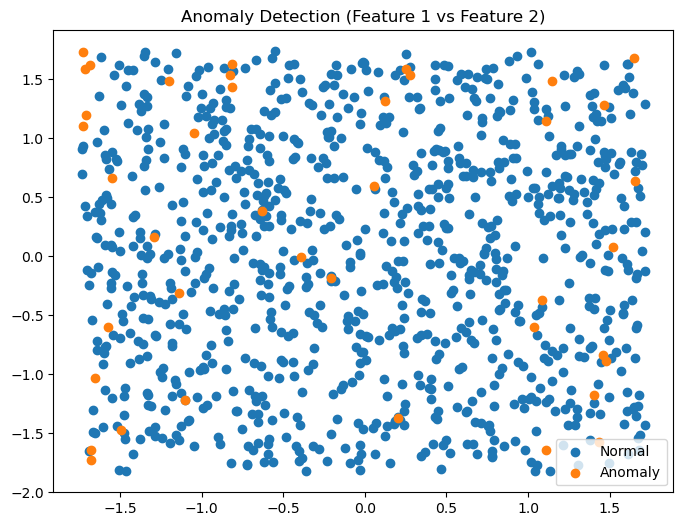

In [66]:
import matplotlib.pyplot as plt

normal = scaled_features_df[scaled_features_df["anomaly"] == 1]
anomaly = scaled_features_df[scaled_features_df["anomaly"] == -1]

plt.figure(figsize=(8,6))

plt.scatter(normal.iloc[:, 0], normal.iloc[:, 1], label="Normal")
plt.scatter(anomaly.iloc[:, 0], anomaly.iloc[:, 1], label="Anomaly")

plt.title("Anomaly Detection (Feature 1 vs Feature 2)")
plt.legend()
plt.show()


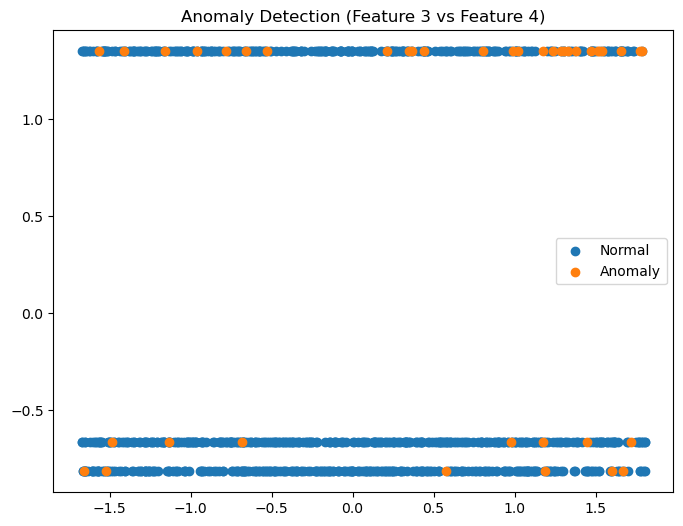

In [67]:
plt.figure(figsize=(8,6))

plt.scatter(normal.iloc[:, 2], normal.iloc[:, 3], label="Normal")
plt.scatter(anomaly.iloc[:, 2], anomaly.iloc[:, 3], label="Anomaly")

plt.title("Anomaly Detection (Feature 3 vs Feature 4)")
plt.legend()
plt.show()


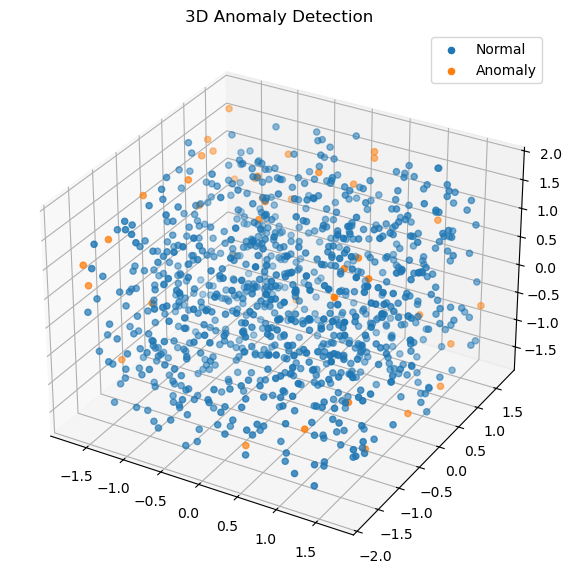

In [68]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(normal.iloc[:, 0], normal.iloc[:, 1], normal.iloc[:, 2], label="Normal")
ax.scatter(anomaly.iloc[:, 0], anomaly.iloc[:, 1], anomaly.iloc[:, 2], label="Anomaly")

ax.set_title("3D Anomaly Detection")
ax.legend()

plt.show()


In [73]:
fig = go.Figure()

fig.add_trace(go.Scatter3d(
    x=normal.iloc[:, 0],
    y=normal.iloc[:, 1],
    z=normal.iloc[:, 2],
    mode='markers',
    name='Normal'
))

fig.add_trace(go.Scatter3d(
    x=anomaly.iloc[:, 0],
    y=anomaly.iloc[:, 1],
    z=anomaly.iloc[:, 2],
    mode='markers',
    name='Anomaly'
))

fig.update_layout(
    title="3D Interactive Anomaly Detection",
    width=900,
    height=950
)

fig.show()
